<a href="https://colab.research.google.com/github/venkata14/Uconn-DSC-Workshops/blob/master/Spring_2022/tensorflow/tensorflow-part1/tensorflow_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow Workshop Part 1

Note, that neural networks are not great for understanding data. They are better suited for predictions

We will first talk about tensors and then talk about neural networks

In [ ]:
# install tensorflow
!pip3 install tensorflow

     |████████████████████████████████| 462 kB 4.3 MB/s 


In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import tensorflow as tf

# Get version
# Note that we are go using Tensorflow 2. There is a Tensorflow 1 but it is considerably different in syntax
tf.__version__

'2.8.0'

# What is a tensor?

In TensorFlow, a tensor is simply multi-dimensional arrays with a uniform type. They are conceptually similar to a numpy array.

Extending this idea, scalars, vectors, and matrices are simply specific types of tensors. A scalar is a rank-0 tensor, a vector is a rank-1 tensor, and a matrix is a rank-2 tensor.

In [3]:
import numpy as np

# Rank-0 tensor
print(tf.constant(8))

# Rank-1 tensor
tf.constant([2.0, 3.0, 4.0])

# Rank-2 tensor
print(tf.zeros((3,3)), '\n')
# Make NumPy Array of zeros
print(np.zeros((3,3)))

tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]], shape=(3, 3), dtype=float32) 

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [ ]:
# Make custom tensor
print(tf.fill([3,3], value=3), '\n')
# Make custom array
array = np.empty([3,3])
array.fill(3)
print(array)

tf.Tensor(
[[3 3 3]
 [3 3 3]
 [3 3 3]], shape=(3, 3), dtype=int32) 

[[3. 3. 3.]
 [3. 3. 3.]
 [3. 3. 3.]]


In [ ]:
data = [[1,2],[3,4]]

# Make custom NumPy array
custom_array = np.array(data)
print(custom_array, '\n')

# Make custom Tensor
custom_tensor = tf.constant(data)
print(custom_tensor)

[[1 2]
 [3 4]] 

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)


In [ ]:
# Change Values in Array and Tensor

custom_array[0,1] = 1
print(custom_array, '\n')

try:
  # Tensors are immutable
  custom_tensor[0,1] = 1
except Exception as e:
  # We will get to the error later
  print(e)


## Math with Tensorflow


In [ ]:
custom_tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]], dtype=int32)>

In [ ]:
# Add Tensors
print(
    tf.math.add(custom_tensor, custom_tensor)
)
# Multiplies Tensors
print(
    tf.math.multiply(custom_tensor, custom_tensor)
)
# Square element-wise
print(
    tf.math.square(custom_tensor)
)


tf.Tensor(
[[2 4]
 [6 8]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[ 1  4]
 [ 9 16]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[ 1  4]
 [ 9 16]], shape=(2, 2), dtype=int32)


### However, it is very tedious to manipulate and work with tensors to preprocess data, handle data, analyze data, etc...

It is easier to do everthing with NumPy Arrays and then do all mathamatical operations for machine learning with Tensors

In [ ]:
# Some complex array manipulation .....
# It's much easier to transform it using NumPy Arrays
data = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
data_arr = np.array(data)
mean = np.mean(data_arr)
data_arr = data_arr - mean
data_arr = data_arr / 20
std = np.std(data_arr)
data_arr = data_arr/std
print(data_arr, '\n')

# Convert it to Tensor
tf.constant(data_arr)

[-1.64750894 -1.47408695 -1.30066495 -1.12724296 -0.95382097 -0.78039897
 -0.60697698 -0.43355498 -0.26013299 -0.086711    0.086711    0.26013299
  0.43355498  0.60697698  0.78039897  0.95382097  1.12724296  1.30066495
  1.47408695  1.64750894] 



<tf.Tensor: shape=(20,), dtype=float64, numpy=
array([-1.64750894, -1.47408695, -1.30066495, -1.12724296, -0.95382097,
       -0.78039897, -0.60697698, -0.43355498, -0.26013299, -0.086711  ,
        0.086711  ,  0.26013299,  0.43355498,  0.60697698,  0.78039897,
        0.95382097,  1.12724296,  1.30066495,  1.47408695,  1.64750894])>

#### In General:
The difference between a NumPy array and a tensor is that the tensors are backed by the accelerator memory like GPU and they are immutable, unlike NumPy arrays. This makes tensors faster

Tensors are immutable because they contain computing instructions to solve the Tensors rather than storing values themselves. This makes Tensors fast but also annoying to use at first.

Each operation you will do with TensorFlow involves the manipulation of a tensor. There are four main tensor type you can create:

- tf.constant 
- tf.Variable (a variable of fixed type and shape)
- tf.placeholder (a v1 implimentation. A placeholder)
- tf.SparseTensor (efficient storage of tensors with a lot of zeros. Also to store unequal tensors)

## Speed Comparison between NumPy Array and TensorFlow Tensor

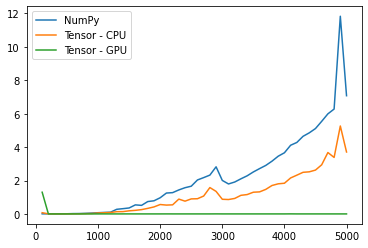

In [ ]:
#import libraries
import tensorflow as tf
import numpy as np
import time
import matplotlib.pyplot as plt

# function performing operation and returning us the time.
# Matrix Product Time
def matmul_time(type,x):
    start = time.time()
    # Use Numpy or TensorFlow
    if type=='numpy':
        np.matmul(x,x)
    else:
        tf.matmul(x,x)
    end = time.time()
    return end - start

# Keep track of times
shape_dim = [] # This will be the x axis
numpy_time = []
cpu_tf_time = []
gpu_tf_time = []

for shape in range(100,5001,100):
    shape_dim.append(shape)

    # NumPy. Using Randome values from a Uniform Distribution
    x = np.random.uniform(size=[shape,shape])
    numpy_time.append(matmul_time('numpy',x))

    #Tensor using GPU
    with tf.device("GPU:0"): # The 0 is the GPU to use. So if you had multiple GPUs, you identify the GPU to use with "GPU:1" or 2,3,...
        x = tf.random.uniform([shape, shape])
        gpu_tf_time.append(matmul_time('gpu',x))
  
    #Tensor using CPU
    with tf.device("CPU:0"):
        x = tf.random.uniform([shape, shape])
        cpu_tf_time.append(matmul_time('cpu',x))

plt.plot(shape_dim, numpy_time, label='NumPy')
plt.plot(shape_dim, cpu_tf_time, label='Tensor - CPU')
plt.plot(shape_dim, gpu_tf_time, label='Tensor - GPU')
plt.legend()
plt.show()

### This is pretty much all there is to their difference. But there is a reason for these differences.

#### Eager Execution vs Graph Execution
Eager Execution simplifies the model building experience in TensorFlow, whereas Graph Execution can provide optimizations that make models run faster with better memory efficiency. 
- Tensors are techinically instructions on how to transform your data. (Why is this important?) 
- You use Eager Execution for prototyping
- You run your model in Graph Execution to run faster


This workshop only goes over Eager Execution

Check this out for Graph Execution:
https://blog.tensorflow.org/2018/08/code-with-eager-execution-run-with-graphs.html

In [4]:
# This workshop will be using Eager Execution

# Turn on Eager Execution
tf.config.run_functions_eagerly(True)

# What are Neural Networks?

Neural Networks form the base of Deep Learning. It recognized patterns in data.

**How is this done?**

- Forward Propigation
- Backward Propigation

### Forward Propigation

(Image from Simplilearn)

<center>
    <img src="attachment:566beaf0-caf1-4e09-810d-397c93043e78.png" align="center"/>
</center>

- Neural Networks are made up of layers of Neurons
    - Neurons are the core processing unit of the network
- There are multiple layers
    - The **Input Layer**: recieves the input
    - The **Output Layer**: predicts the final output
    - The **Hidden Layers**: layers that perform most of the computation required by the network
    
Above is an image of a circle and we want the network to predict that it is a circle
- Each neuron of one layer is connect to neurons of another layer through a channel
    - The image above only shows 2 channels per neuron but this can differ
    - Each channel has a "weight" associated to it
- At first, the inputs are multiplied to their corresponding weight and their sum is sent as input to the hidden layer
    - Each sum has a "bias" which is added to the input sum
- The individual neurons in the hidden layer can choose to become active or not based on the "activation function"
    - An example of this activation could be like "if the input I recieved is greater than 0, I activate and send that value to the next hidden layer. If the input is equal to or less than 0, I deactivate and send 0 to the next hidden layer"
    - This is how it transmits data to the next layer of the network
- The process recurrs until it reachs the end of the network where it gives us an output. This is called Forward Propigation
    - The output could be defined as the neuron with the highest value (the activation function)
    
After a Forward Pass, The network calculates how wrong it is through a loss function
- There is a simple loss function above. Can you figure it out?
This error information is sent backward through the network and changes the parameters of the network. This is called Backward Propigation. 
- It updates the parameters (weights and bias) through an "optimization function"

Everytime one cycle of Forward Propigation and Backward Propigation occurs, the model gets a little better at predicting the right output. 


# We will be using the Keras API to build our models

What is Keras?

# Dense Neural Network

**What is a Dense Neural Network (Keras)?**

A dense neural network is a network composed of "dense" layers that are all connected "deeply", which means each neuron in the dense layer receives input from all neurons of its previous layer. This layer is the most commonly used layer in models.

**How does it work and what happens at each internal node?**

<center>
    <img src="attachment:c19d3a68-e28b-4cfd-bf19-45206e8c860b.png" align="center"/>
</center>

**Few Key Parameters of the Keras Dense Layer:**

1. Units
    - The number of internal nodes
2. Activation
    - Define the activation function -> a function that transforms the incoming signal of each neuron. Used to induce non-linearity into a neural network to allow the network to learn complex relationships
    - The most common used is the Rectified Linear Unit (ReLU) activation function
        - y = max(0,x)
        
As we go through this work shop, I will slowly introduce more layers and activation functions

**Flatten Layer** -> Flattens the input

**Linear Activation Function** -> This is basically a pass-through


### Dataset: MNIST

<center>
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/MnistExamples.png/320px-MnistExamples.png" align="center"/>
</center>

- MNIST is a large database of small, square 28x28 pixel grayscale images of handwritten single digits between 0 and 9
- It consists of a total of 70,000 handwritten images of digits, with the training set having 60,000 images and the test set having 10,000
- All images are labeled with the respective digit that they represent. There are a total of 10 classes of digits (from 0 to 9)
- The training data is the images and they are represented as a 28x28 matrix where the value at a specific position is the brightness of the respective pixel 


(60000, 28, 28)
(10000, 28, 28)


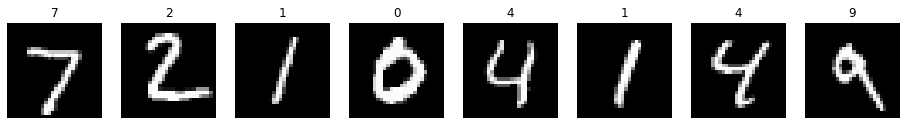

In [5]:
from io import BytesIO
import requests
import matplotlib.pyplot as plt
%matplotlib inline


# importing and dividing up the dataset into train and test cases
r = requests.get('https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz', stream = True)
data = np.load(BytesIO(r.raw.read())) #np.load only reads files. BytesIO creates file like object
x_test, x_train, y_train, y_test = data['x_test'], data['x_train'], data['y_train'], data['y_test']


# Number of samples for Train Data
print(x_train.shape)
# Number of samples for Test Data
print(x_test.shape)


# Visulaize some of the Data
num_to_show = 8
fig, ax = plt.subplots(1, num_to_show, figsize=(num_to_show*2, num_to_show*2))

for index, axplot in enumerate(ax):
    # An easy way to show a matrix of pixel values as an image is with the imshow() function 
    axplot.imshow(x_test[index], cmap='gist_gray')
    axplot.axis('off')
    axplot.set_title(str(y_test[index]))
plt.show()

In [ ]:
# Pixel Values
# This shows the number 7
print(x_test[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 241 198 198 198 19

### Lets Build a Neural Network

So far, for X, we have a matrix of values. For Y we have the range 0-9.

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten 

# Define the inner layer
n_hidden1 = 512  # 1st hidden layer
n_hidden2 = 256  # 2nd hidden layer
n_hidden3 = 128  # 3rd hidden layer
n_output = 1  # output layer (0-9 digits)

# Parameters
epochs = 30 # This is the number of times to iterate over the training set
batch_size = 128 # Update the network parameters after iterating through a number of samples

# We use Sequential as it forms a linear stack of layers
model = Sequential()
model.add(Flatten(input_shape=(28,28))) # This is the input layer
model.add(Dense(n_hidden1, activation='relu'))
model.add(Dense(n_hidden2, activation='relu'))
model.add(Dense(n_hidden3, activation='relu'))
model.add(Dense(n_output, activation='linear')) # This is the output layer

In [7]:
# To get a summary of our model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 566,273
Trainable params: 566,273
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Compile the model
# We talked about the loss used here before
# You can use Stocastic Gradient decent here for the optimizer but Adam is far more efficient and is most commonly used
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['accuracy'])
# Fit the model
history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test), batch_size=batch_size)

Epoch 1/30
469/469 [==============================] - 16s 27ms/step - loss: 2.4122 - accuracy: 0.1315 - val_loss: 1.0380 - val_accuracy: 0.1602
Epoch 2/30
469/469 [==============================] - 11s 23ms/step - loss: 0.8221 - accuracy: 0.1581 - val_loss: 0.7403 - val_accuracy: 0.1759
Epoch 3/30
469/469 [==============================] - 11s 23ms/step - loss: 0.6812 - accuracy: 0.1725 - val_loss: 0.6458 - val_accuracy: 0.1801
Epoch 4/30
469/469 [==============================] - 11s 24ms/step - loss: 0.5816 - accuracy: 0.1858 - val_loss: 0.5593 - val_accuracy: 0.1986
Epoch 5/30
469/469 [==============================] - 12s 25ms/step - loss: 0.4973 - accuracy: 0.1962 - val_loss: 0.5020 - val_accuracy: 0.2033
Epoch 6/30
469/469 [==============================] - 12s 25ms/step - loss: 0.4646 - accuracy: 0.1995 - val_loss: 0.4384 - val_accuracy: 0.2019
Epoch 7/30
469/469 [==============================] - 11s 24ms/step - loss: 0.4110 - accuracy: 0.2033 - val_loss: 0.4181 - val_accuracy:

In [9]:
type(history.history) # This is a dictionary containing the metric information defined above

dict

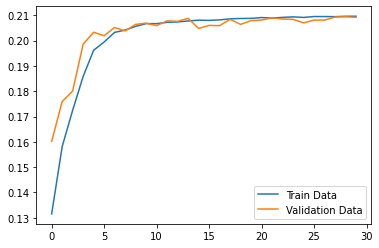

In [10]:
plt.plot(history.history['accuracy'], label="Train Data")
plt.plot(history.history['val_accuracy'], label="Validation Data")
plt.legend()
plt.show()

#### The accuracy above is not great. Using the linear activation is not the best for classification tasks
- To get a higher accuracy, we would rather have one output node for each "class". In this case, the numbers. Sowe sould want 10 output nodes

**Soft Max Activation Function**

<center>
    <img src="https://www.easy-tensorflow.com/images/NN/linear_classifier.png" align="center"/>
</center>

##### In order to train like this, your y labels need to be one-hot-encoded

7 becomes [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]

1 becomes [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]


In [11]:
from sklearn.preprocessing import OneHotEncoder

inst = OneHotEncoder()
y_train_encoded = inst.fit_transform(y_train.reshape(-1,1)).toarray()

inst = OneHotEncoder()
y_test_encoded = inst.fit_transform(y_test.reshape(-1,1)).toarray()

In [14]:
print(y_test)
y_test_encoded

[7 2 1 ... 4 5 6]


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten 

# Define the inner layer
n_hidden1 = 512  # 1st hidden layer
n_hidden2 = 256  # 2nd hidden layer
n_hidden3 = 128  # 3rd hidden layer
n_output = 10  # output layer. This time, 10 output nodes

# Parameters
epochs = 30 # This is the number of times to iterate over the training set
batch_size = 128 # Update the network parameters after iterating through a number of samples

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(n_hidden1, activation='relu'))
model.add(Dense(n_hidden2, activation='relu'))
model.add(Dense(n_hidden3, activation='relu'))
model.add(Dense(n_output, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 dense_9 (Dense)             (None, 256)               131328    
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


#### We need a different loss function for this improved network

**Categorical Crossentropy**

- Compares the the predicted probability distribution to the target probability distribution and outputs an error (shown above)

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train_encoded, epochs=epochs, validation_data=(x_test, y_test_encoded), batch_size=batch_size)

Epoch 1/30
469/469 [==============================] - 12s 26ms/step - loss: 1.6826 - accuracy: 0.8921 - val_loss: 0.3164 - val_accuracy: 0.9354
Epoch 2/30
469/469 [==============================] - 12s 25ms/step - loss: 0.2142 - accuracy: 0.9524 - val_loss: 0.2277 - val_accuracy: 0.9510
Epoch 3/30
469/469 [==============================] - 12s 25ms/step - loss: 0.1226 - accuracy: 0.9687 - val_loss: 0.1834 - val_accuracy: 0.9598
Epoch 4/30
469/469 [==============================] - 12s 25ms/step - loss: 0.0988 - accuracy: 0.9737 - val_loss: 0.1781 - val_accuracy: 0.9583
Epoch 5/30
469/469 [==============================] - 12s 25ms/step - loss: 0.0821 - accuracy: 0.9765 - val_loss: 0.1825 - val_accuracy: 0.9593
Epoch 6/30
469/469 [==============================] - 12s 25ms/step - loss: 0.0799 - accuracy: 0.9781 - val_loss: 0.2604 - val_accuracy: 0.9441
Epoch 7/30
469/469 [==============================] - 11s 24ms/step - loss: 0.0823 - accuracy: 0.9778 - val_loss: 0.1456 - val_accuracy:

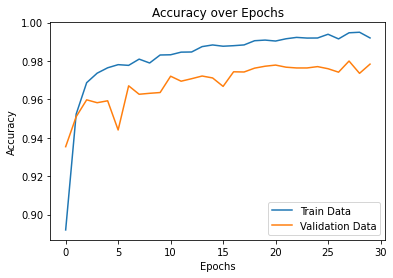

In [17]:
plt.plot(history.history['accuracy'], label="Train Data")
plt.plot(history.history['val_accuracy'], label="Validation Data")
plt.title("Accuracy over Epochs")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Now we can use our model to predict values!

*Note: The inputs mush be preprocessed the same way when we trained the model*

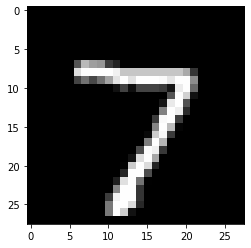

In [ ]:
# Take a sample
sample = x_test[0]

# See this sample
plt.imshow(sample, cmap="gist_gray")
plt.show()

In [ ]:
# Predict using the trained model
# Note: since we trained the model on a 3 dimentional vector, the input to the predict function must be a three dimentional vector
print(x_train.shape)
print(sample.shape)
sample = np.expand_dims(sample, axis=0)
print(sample.shape)

(60000, 28, 28)
(28, 28)
(1, 28, 28)


In [ ]:
# Predict using model
prediction = model.predict(sample)
print(prediction)

# To get the predicted number
print('Prediction:', np.argmax(prediction))

[[6.6710490e-09 2.6235233e-07 2.4472547e-05 1.8914388e-06 6.1863531e-08
  6.0165370e-08 3.6564692e-18 9.9996793e-01 2.7332106e-10 5.3509593e-06]]
Prediction: 7


In [ ]:
# Predict everything in one go
predictions = model.predict(x_test)

In [ ]:
print(predictions.shape)
print(predictions[0])

# Convert predictions into a more human friendly format
predictions = np.array([np.argmax(n) for n in predictions])
print(predictions)

(10000, 10)
[6.6710490e-09 2.6235233e-07 2.4472525e-05 1.8914407e-06 6.1863652e-08
 6.0165256e-08 3.6564692e-18 9.9996793e-01 2.7332056e-10 5.3509593e-06]
[7 2 1 ... 4 5 6]


In [ ]:
# To calculate accuracy
from sklearn.metrics import accuracy_score, f1_score

print('Accuracy:', accuracy_score(y_test, predictions))
print('F1 Score:', f1_score(y_test, predictions, average='macro')) # We talk about this in a previous workshop. It is the average of percision and recall

Accuracy: 0.9736
F1 Score: 0.9733315702728247


---

### On a side note, there are multiple ways to create a nmmeural network

#### List like Method

In [18]:
# Define the inner layer
n_hidden1 = 512  # 1st hidden layer
n_hidden2 = 256  # 2nd hidden layer
n_hidden3 = 128  # 3rd hidden layer
n_output = 10  # output layer. This time, 10 output nodes

# Parameters
epochs = 30 # This is the number of times to iterate over the training set
batch_size = 128 # Update the network parameters after iterating through a number of samples

model = Sequential([
                    Flatten(input_shape=(28,28)),
                    Dense(n_hidden1, activation='relu'),
                    Dense(n_hidden2, activation='relu'),
                    Dense(n_hidden3, activation='relu'),
                    Dense(n_output, activation='softmax')
], name="list_like_method")
model.summary()

Model: "list_like_method"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 dense_14 (Dense)            (None, 128)               32896     
                                                                 
 dense_15 (Dense)            (None, 10)                1290      
                                                                 
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


#### Method 3: Functional API

In [19]:
from tensorflow.keras import Input, Model, Sequential
from tensorflow.keras.layers import Flatten, Dense

# The next layer is a function layer of the previous layers
inputs = Input(shape=(28,28))
inner = Flatten()(inputs)
inner = Dense(n_hidden1, activation='relu')(inner)
inner = Dense(n_hidden2, activation='relu')(inner)
inner = Dense(n_hidden3, activation='relu')(inner)
outputs = Dense(n_output, activation='softmax')(inner)

model = Model(inputs=inputs, outputs=outputs, name="functional_api")
# This is not a good way to visualize this Model
model.summary()

Model: "functional_api"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 512)               401920    
                                                                 
 dense_17 (Dense)            (None, 256)               131328    
                                                                 
 dense_18 (Dense)            (None, 128)               32896     
                                                                 
 dense_19 (Dense)            (None, 10)                1290      
                                                                 
Total params: 567,434
Trainable params: 567,434
Non-

In [20]:
## For a better wasy to visualize a model first tensorflow.keras.layershviz
!pip3 install pydot
!pip3 install pydotplus
# Install GraphViz from https://graphviz.org/download/

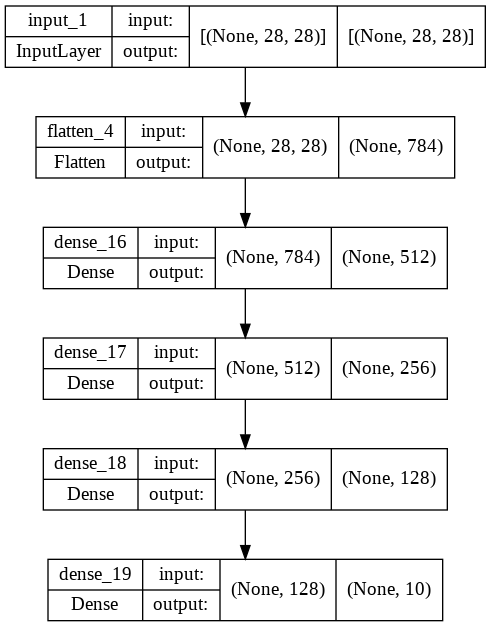

In [21]:
from tensorflow.keras.utils import plot_model

# Visualize models
plot_model(model, show_shapes=True)

In [22]:
# This is why the Functional API is great

from tensorflow.keras import Input, Model
from tensorflow.keras.layers import concatenate

inputs = Input(shape=(28,28))
inner = Flatten()(inputs)
inner = Dense(n_hidden1, activation='relu')(inner)
inner1 = Dense(n_hidden1, activation='relu')(inner)
inner2 = Dense(n_hidden2, activation='relu')(inner)
inner3 = concatenate([inner1, inner2])
inner = Dense(n_hidden3, activation='relu')(inner3)
outputs = Dense(n_output, activation='softmax')(inner)

model = Model(inputs=inputs, outputs=outputs, name="functional_api_1")
# This is not a good way to visualize this Model
model.summary()

Model: "functional_api_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 28, 28)]     0           []                               
                                                                                                  
 flatten_5 (Flatten)            (None, 784)          0           ['input_2[0][0]']                
                                                                                                  
 dense_20 (Dense)               (None, 512)          401920      ['flatten_5[0][0]']              
                                                                                                  
 dense_21 (Dense)               (None, 512)          262656      ['dense_20[0][0]']               
                                                                                   

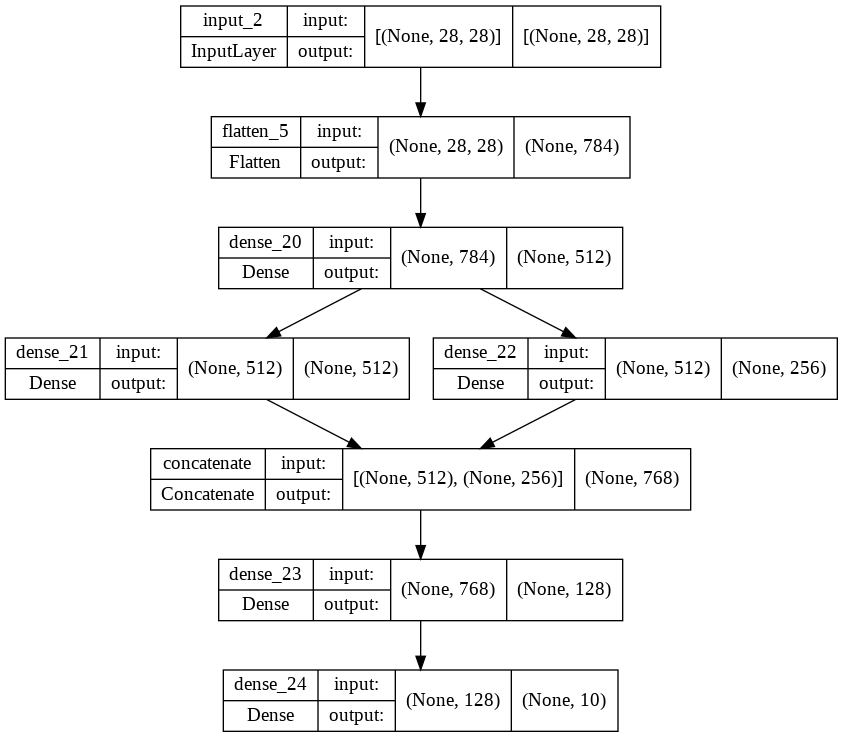

In [23]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

In [24]:
# You can run them as you normally would
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train_encoded, epochs=4, batch_size=batch_size)

Epoch 1/4
469/469 [==============================] - 21s 45ms/step - loss: 2.2665 - accuracy: 0.8870
Epoch 2/4
469/469 [==============================] - 18s 38ms/step - loss: 0.1725 - accuracy: 0.9550
Epoch 3/4
469/469 [==============================] - 11s 24ms/step - loss: 0.1048 - accuracy: 0.9706
Epoch 4/4
469/469 [==============================] - 12s 25ms/step - loss: 0.0814 - accuracy: 0.9756


### So do we have a great model for identifying handwritten digits? ... NO!

Can you tell what the problem with out model is?

What happens if we shift our images to the left?

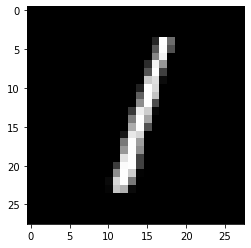

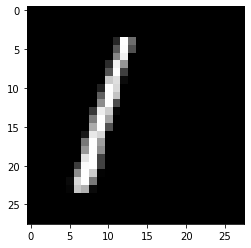

In [34]:
sample = x_test[2]
plt.imshow(sample, cmap='gist_gray')
plt.show()

# Shifting the image to the left
shifted_sample = np.roll(sample, -5, axis=1)
plt.imshow(shifted_sample, cmap='gist_gray')
plt.show()

In [35]:
shifted_sample = np.expand_dims(shifted_sample, axis=0)

# Predict using model
prediction = model.predict(shifted_sample)

# To get the predicted number
print('Prediction:', np.argmax(prediction)) # It predicts the wrong number!

Prediction: 2


In [29]:
# The original accuracy and F1 Score of the model
from sklearn.metrics import accuracy_score, f1_score

# Predict everything in one go
predictions = model.predict(x_test)

# Convert predictions into a more human friendly format
predictions = np.array([np.argmax(n) for n in predictions])

# To calculate accuracy and F1 Score
print('Accuracy:', accuracy_score(y_test, predictions))
print('F1 Score:', f1_score(y_test, predictions, average='macro')) # We talk about this in a previous workshop. It is the average of percision and recall

Accuracy: 0.9593
F1 Score: 0.958779949362531


In [30]:
# What are the accuracy and F1 Score of the model if we shift the digits?
# Creating the shifted images
x_test_shifted = np.array([np.roll(n, -5, axis=1) for n in x_test])

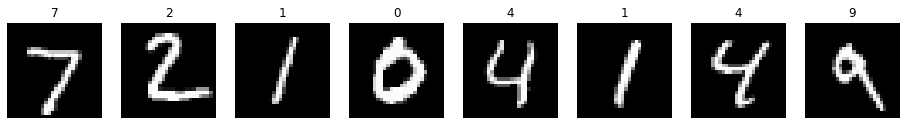

In [31]:
# Visulaize Original Data
num_to_show = 8
fig, ax = plt.subplots(1, num_to_show, figsize=(num_to_show*2, num_to_show*2))

for index, axplot in enumerate(ax):
    # An easy way to show a matrix of pixel values as an image is with the imshow() function 
    axplot.imshow(x_test[index], cmap='gist_gray')
    axplot.axis('off')
    axplot.set_title(str(y_test[index]))
plt.show()

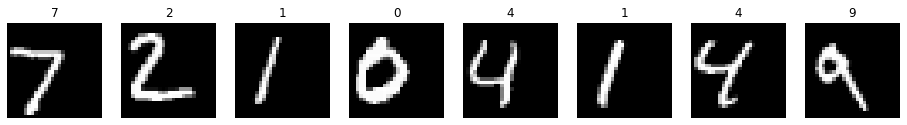

In [32]:
# Visulaize the Shifted Data
num_to_show = 8
fig, ax = plt.subplots(1, num_to_show, figsize=(num_to_show*2, num_to_show*2))

for index, axplot in enumerate(ax):
    # An easy way to show a matrix of pixel values as an image is with the imshow() function 
    axplot.imshow(x_test_shifted[index], cmap='gist_gray')
    axplot.axis('off')
    axplot.set_title(str(y_test[index]))
plt.show()

In [33]:
# The original accuracy and F1 Score of the model
from sklearn.metrics import accuracy_score, f1_score

# Predict everything in one go
predictions = model.predict(x_test_shifted)

# Convert predictions into a more human friendly format
predictions = np.array([np.argmax(n) for n in predictions])

# To calculate accuracy and F1 Score
print('Accuracy:', accuracy_score(y_test, predictions))
print('F1 Score:', f1_score(y_test, predictions, average='macro')) # We talk about this in a previous workshop. It is the average of percision and recall

Accuracy: 0.2674
F1 Score: 0.22138602160943507


### The accuracy is basically gone by shifting the image 5 pixels to the right

Why is that? and how can we fix it?

## Convolutional Neural Networks

These networks are used everywhere: self driving cars, facial recognition, etc

Convolutional Neural Networks learn **features**.
- They do this by applying filters onto images and extracting features from them
- As for what filters to apply, they learn these filters

Down below are filter examples. Filters are commonly referred to as kernals
- Down below, we use a 3 by 3 filter

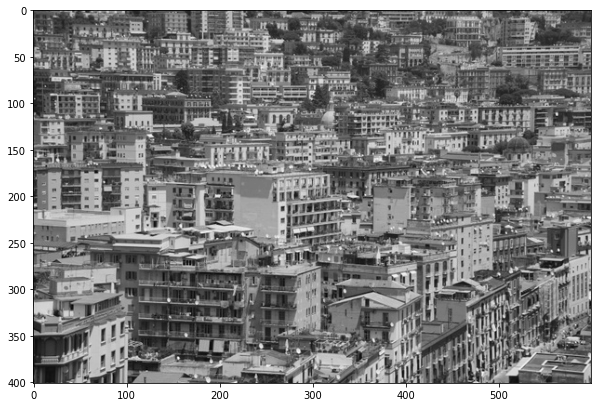

In [36]:
import urllib
import PIL

# You can import any image and see what you can make!
# If this throws an error, use a different URL
url = 'https://images.all-free-download.com/images/graphiclarge/buildings_city_crowded_215206.jpg'
image = np.array(PIL.Image.open(urllib.request.urlopen(url)).convert('L'))

plt.figure(figsize=(10,10))
plt.imshow(image, cmap='gist_gray')
plt.show()

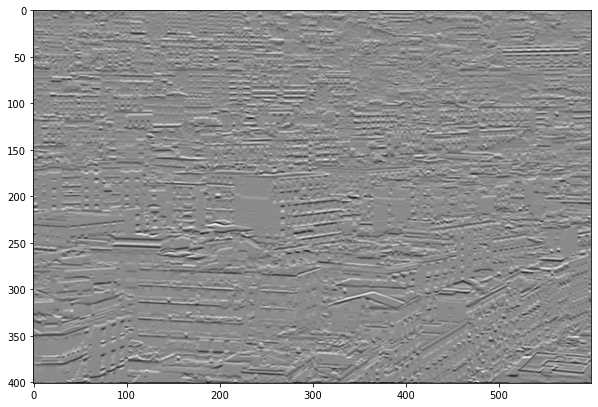

In [37]:
from scipy.signal import convolve2d

# The Sobel Horizontal Operator
# Horizontal Edge Detection
kernal = np.array([[2, 4, 2], 
                   [0, 0, 0], 
                   [-2, -4, -2]])

filtered_image = convolve2d(image, kernal,  mode='same')

plt.figure(figsize=(10,10))

plt.imshow(filtered_image, cmap='gist_gray')
plt.show()

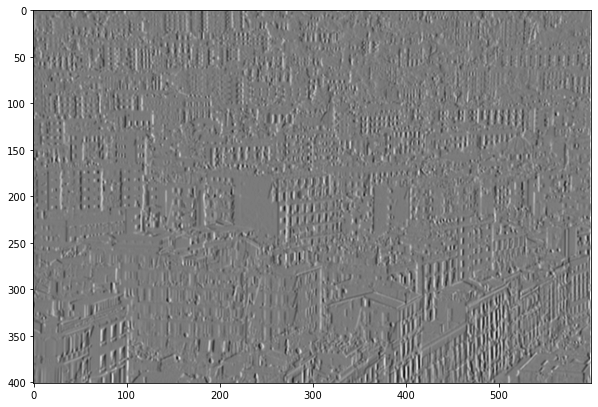

In [38]:
from scipy.signal import convolve2d

# The Sobel Vertical Operator
# Vertical Edge Detection
kernal = np.array([[-1, 0, 1], 
                   [-2, 0, 2],
                   [-1, 0, 1]])

filtered_image = convolve2d(image, kernal, mode='same' )

plt.figure(figsize=(10,10))

plt.imshow(filtered_image, cmap='gist_gray')
plt.show()

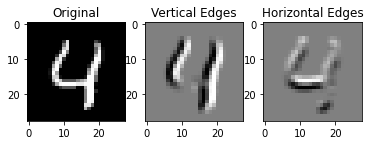

In [39]:
from scipy.signal import convolve2d

kernal_vertical = np.array([[-1, 0, 1], 
                   [-2, 0, 2],
                   [-1, 0, 1]])

kernal_horizontal = np.array([[2, 4, 2], 
                   [0, 0, 0], 
                   [-2, -4, -2]])

sample = x_test[4]

fig, ax = plt.subplots(1, 3)

ax[0].imshow(sample, cmap='gist_gray')
ax[0].set_title('Original')
ax[1].imshow(convolve2d(sample, kernal_vertical, mode='same'), cmap='gist_gray')
ax[1].set_title('Vertical Edges')
ax[2].imshow(convolve2d(sample, kernal_horizontal, mode='same'), cmap='gist_gray')
ax[2].set_title('Horizontal Edges')
plt.show()

#### The Pros with using these kernals as that the position does not matter

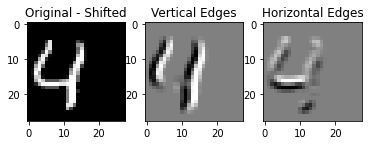

In [40]:
from scipy.signal import convolve2d

kernal_vertical = np.array([[-1, 0, 1], 
                   [-2, 0, 2],
                   [-1, 0, 1]])

kernal_horizontal = np.array([[2, 4, 2], 
                   [0, 0, 0], 
                   [-2, -4, -2]])

sample = x_test_shifted[4]

fig, ax = plt.subplots(1, 3)

ax[0].imshow(sample, cmap='gist_gray')
ax[0].set_title('Original - Shifted')
ax[1].imshow(convolve2d(sample, kernal_vertical, mode='same'), cmap='gist_gray')
ax[1].set_title('Vertical Edges')
ax[2].imshow(convolve2d(sample, kernal_horizontal, mode='same'), cmap='gist_gray')
ax[2].set_title('Horizontal Edges')
plt.show()

### What happens after these features have been identified?

---
## Convolution Layer

We are going to use Conv2D as we are using 2D images

**Important Paramaters:**
- filters: the Number of filters to learn
- kernal_size: the dimentionsof the kernals to use
- activation
- strides: how much to move the filter
- padding: what to do with the edges


In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten
#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), padding='valid', input_shape=(28,28,1))) # What is this 1 at the end of the input shape?
model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(16, (3, 3), activation='relu', strides=(1, 1), padding='valid'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 16)        4624      
                                                                 
 flatten_6 (Flatten)         (None, 7744)              0         
                                                                 
 dense_25 (Dense)            (None, 256)               1982720   
                                                                 
 dense_26 (Dense)            (None, 128)               32896     
                                                                 
 dense_27 (Dense)            (None, 64)               

In [42]:
# we have to expand the dimentions of the input matrix to show the color channel
x_train_conv = x_train.reshape(-1, x_train.shape[1], x_train.shape[2], 1)
x_test_conv = x_test.reshape(-1, x_test.shape[1], x_test.shape[2], 1)
x_test_shifted_conv = x_test_shifted.reshape(-1, x_test_shifted.shape[1], x_test_shifted.shape[2], 1)

In [43]:
x_train_conv.astype('float32')
x_test_conv.astype('float32')

print(x_train_conv.shape)
print(x_test_conv.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [44]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#train the model
history = model.fit(x_train_conv, y_train_encoded, epochs=epochs, batch_size=batch_size)

Epoch 1/30
469/469 [==============================] - 23s 34ms/step - loss: 0.2522 - accuracy: 0.9402
Epoch 2/30
469/469 [==============================] - 15s 33ms/step - loss: 0.0538 - accuracy: 0.9837
Epoch 3/30
469/469 [==============================] - 15s 33ms/step - loss: 0.0358 - accuracy: 0.9887
Epoch 4/30
469/469 [==============================] - 15s 33ms/step - loss: 0.0225 - accuracy: 0.9928
Epoch 5/30
469/469 [==============================] - 15s 33ms/step - loss: 0.0217 - accuracy: 0.9927
Epoch 6/30
469/469 [==============================] - 16s 33ms/step - loss: 0.0182 - accuracy: 0.9941
Epoch 7/30
469/469 [==============================] - 16s 33ms/step - loss: 0.0158 - accuracy: 0.9950
Epoch 8/30
469/469 [==============================] - 16s 33ms/step - loss: 0.0139 - accuracy: 0.9956
Epoch 9/30
469/469 [==============================] - 16s 33ms/step - loss: 0.0157 - accuracy: 0.9952
Epoch 10/30
469/469 [==============================] - 16s 33ms/step - loss: 0.011

In [45]:
from sklearn.metrics import accuracy_score, f1_score

# Predict everything in one go
predictions = model.predict(x_test_conv)

# Convert predictions into a more human friendly format
predictions = np.array([np.argmax(n) for n in predictions])

# To calculate accuracy and F1 Score
print('Original Data')
print('Accuracy:', accuracy_score(y_test, predictions))
print('F1 Score:', f1_score(y_test, predictions, average='macro'))

Original Data
Accuracy: 0.9862
F1 Score: 0.9861193140937567


In [46]:
# For Shifted Data
from sklearn.metrics import accuracy_score, f1_score

# Predict everything in one go
predictions = model.predict(x_test_shifted_conv)

# Convert predictions into a more human friendly format
predictions = np.array([np.argmax(n) for n in predictions])

# To calculate accuracy and F1 Score
print('Shifted Data')
print('Accuracy:', accuracy_score(y_test, predictions))
print('F1 Score:', f1_score(y_test, predictions, average='macro'))

Shifted Data
Accuracy: 0.4422
F1 Score: 0.4286420597945697


### The accuracy for the shifted dataset is lower than one would expect. Why is that? More on that in a bit. First what are the Convolutional layers doing?

### Feature Map

In [70]:
layer_names = [layer.name for layer in model.layers]
layer_outputs = [layer.output for layer in model.layers]
layer_outputs

[<KerasTensor: shape=(None, 26, 26, 64) dtype=float32 (created by layer 'conv2d')>,
 <KerasTensor: shape=(None, 24, 24, 32) dtype=float32 (created by layer 'conv2d_1')>,
 <KerasTensor: shape=(None, 22, 22, 16) dtype=float32 (created by layer 'conv2d_2')>,
 <KerasTensor: shape=(None, 7744) dtype=float32 (created by layer 'flatten_6')>,
 <KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'dense_25')>,
 <KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'dense_26')>,
 <KerasTensor: shape=(None, 64) dtype=float32 (created by layer 'dense_27')>,
 <KerasTensor: shape=(None, 64) dtype=float32 (created by layer 'dense_28')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_29')>]

In [57]:
feature_map_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

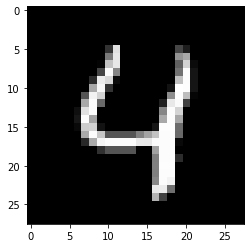

In [74]:
sample = x_test[4]
plt.imshow(sample, cmap='gist_gray')
plt.show()

In [75]:
feature_maps = feature_map_model.predict(sample.reshape((-1, 28, 28, 1)))

In [76]:
layer_names

['conv2d',
 'conv2d_1',
 'conv2d_2',
 'flatten_6',
 'dense_25',
 'dense_26',
 'dense_27',
 'dense_28',
 'dense_29']

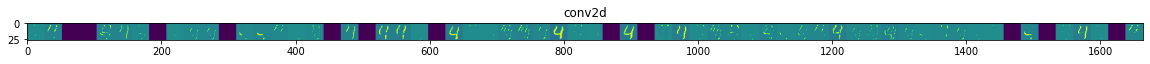

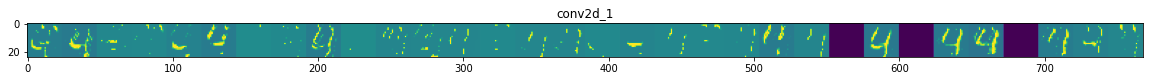

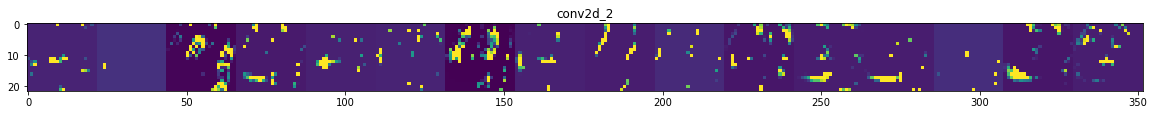

In [77]:
for layer_name, feature_map in zip(layer_names, feature_maps):
  if len(feature_map.shape) == 4:
    channels = feature_map.shape[-1]
    size = feature_map.shape[1]
    display_grid = np.zeros((size, size*channels))
    for i in range(channels):
      feature_image = feature_map[0, :, :, i]
      feature_image -= feature_image.mean()
      feature_image /= feature_image.std ()
      feature_image *=  64
      feature_image += 128
      feature_image = np.clip(feature_image, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = feature_image 
    
    scale = 20. / channels
    plt.figure(figsize=(scale * channels, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect="auto", cmap="viridis")

### Is there anyway to improve the model?

In [78]:
##### from tensorflow.keras import Input, Model
from tensorflow.keras.layers import concatenate, Dropout, MaxPool2D

inputs = Input(shape=(28,28,1))

path1 = Flatten()(inputs)
path1 = Dense(512, activation='relu')(path1)
path1 = Dense(256, activation='relu')(path1)
path1 = Dense(128, activation='relu')(path1)

path2 = Conv2D(64, (3, 3), activation='relu', strides=(1, 1), padding='valid')(inputs)
path2 = MaxPool2D()(path2)
path2 = Conv2D(32, (3, 3), activation='relu', strides=(1, 1), padding='valid')(path2)
path2 = MaxPool2D()(path2)
path2 = Conv2D(16, (3, 3), activation='relu', strides=(1, 1), padding='valid')(path2)
path2 = Flatten()(path2)

combined = concatenate([path1, path2])
end = Dense(128, activation='relu')(combined)
end = Dropout(0.4)(end)
outputs = Dense(10, activation='softmax')(end)

model = Model(inputs=inputs, outputs=outputs, name="functional_api_1")
# This is not a good way to visualize this Model
model.summary()

Model: "functional_api_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_3 (Conv2D)              (None, 26, 26, 64)   640         ['input_3[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 13, 13, 64)   0           ['conv2d_3[0][0]']               
                                                                                                  
 flatten_7 (Flatten)            (None, 784)          0           ['input_3[0][0]']                
                                                                                   

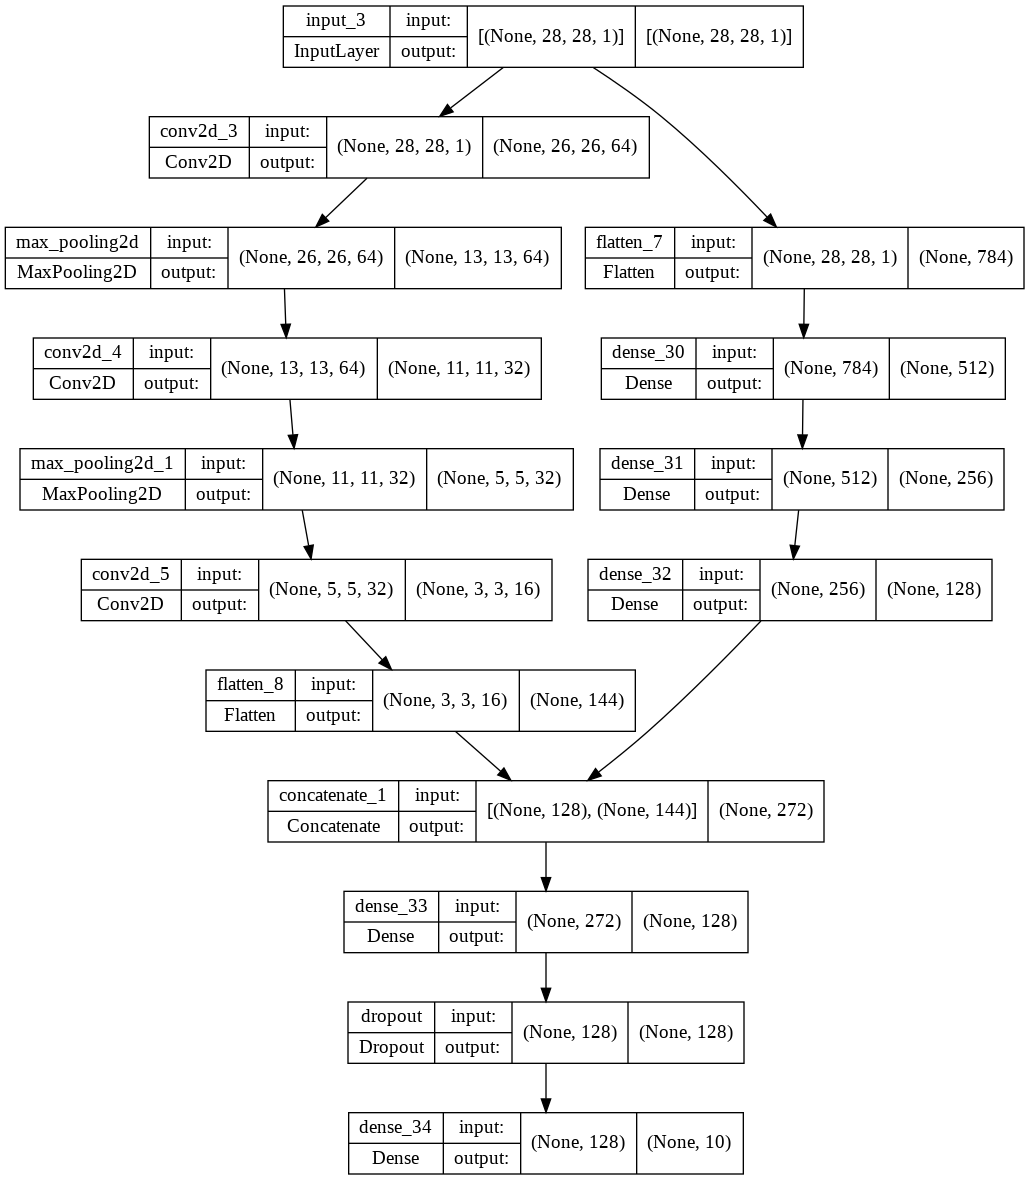

In [79]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

In [80]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#train the model
history = model.fit(x_train_conv, y_train_encoded, epochs=epochs, batch_size=batch_size)

Epoch 1/30
469/469 [==============================] - 17s 35ms/step - loss: 1.0678 - accuracy: 0.8541
Epoch 2/30
469/469 [==============================] - 16s 34ms/step - loss: 0.1758 - accuracy: 0.9513
Epoch 3/30
469/469 [==============================] - 16s 35ms/step - loss: 0.1172 - accuracy: 0.9674
Epoch 4/30
469/469 [==============================] - 17s 35ms/step - loss: 0.0839 - accuracy: 0.9766
Epoch 5/30
469/469 [==============================] - 16s 34ms/step - loss: 0.0732 - accuracy: 0.9791
Epoch 6/30
469/469 [==============================] - 16s 35ms/step - loss: 0.0638 - accuracy: 0.9815
Epoch 7/30
469/469 [==============================] - 16s 34ms/step - loss: 0.0575 - accuracy: 0.9837
Epoch 8/30
469/469 [==============================] - 16s 35ms/step - loss: 0.0565 - accuracy: 0.9834
Epoch 9/30
469/469 [==============================] - 17s 36ms/step - loss: 0.0526 - accuracy: 0.9851
Epoch 10/30
469/469 [==============================] - 17s 37ms/step - loss: 0.049

In [81]:
from sklearn.metrics import accuracy_score, f1_score

# Predict everything in one go
predictions = model.predict(x_test_conv)

# Convert predictions into a more human friendly format
predictions = np.array([np.argmax(n) for n in predictions])

# To calculate accuracy and F1 Score
print('Original Data')
print('Accuracy:', accuracy_score(y_test, predictions))
print('F1 Score:', f1_score(y_test, predictions, average='macro'))

Original Data
Accuracy: 0.9894
F1 Score: 0.9893778831695823


In [82]:
# For Shifted Data
from sklearn.metrics import accuracy_score, f1_score

# Predict everything in one go
predictions = model.predict(x_test_shifted_conv)

# Convert predictions into a more human friendly format
predictions = np.array([np.argmax(n) for n in predictions])

# To calculate accuracy and F1 Score
print('Shifted Data')
print('Accuracy:', accuracy_score(y_test, predictions))
print('F1 Score:', f1_score(y_test, predictions, average='macro'))

Shifted Data
Accuracy: 0.4946
F1 Score: 0.4840648579967343
